<h1>Define The problem</h1>
Where did Chase Bank customers deposit the most money last year?<br>
Which bank branch has seen the most growth in deposits? <br>
How did the bank network of branch locations grow over the past century? <br>
What city has the most bank branches per capita?<br>


<h1>The Data source Kaggle</h1>
https://www.kaggle.com/datasets/chasebank/bank-deposits

<h1>data may relate</h1>
income<br>
GDP<br>

<h3>understand the data</h3>
<table>
  <tr>
    <th>Column Name</th>
    <th>Data Type</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>Institution Name</td>
    <td>String</td>
    <td>Represents the name of the institution. Contains only one unique value, "JPMorgan Chase Bank".</td>
  </tr>
  <tr>
    <td>Main Office</td>
    <td>Boolean</td>
    <td>Indicates whether the branch is the main office. A value of 1 represents true, and a value of 0 represents false.</td>
  </tr>
  <tr>
    <td>Branch Name</td>
    <td>String</td>
    <td>Represents the name of the branch.</td>
  </tr>
  <tr>
    <td>Branch Number</td>
    <td>Integer</td>
    <td>Represents the ID or number assigned to the branch.</td>
  </tr>
  <tr>
    <td>Established Date</td>
    <td>Date</td>
    <td>Indicates the date when the branch was established.</td>
  </tr>
  <tr>
    <td>Acquired Date</td>
    <td>Date</td>
    <td>Indicates the date when the branch was acquired.</td>
  </tr>
  <tr>
    <td>Street Address</td>
    <td>String</td>
    <td>Represents the street address of the branch.</td>
  </tr>
  <tr>
    <td>City</td>
    <td>String</td>
    <td>Represents the city where the branch is located.</td>
  </tr>
  <tr>
    <td>County</td>
    <td>String</td>
    <td>Represents the county where the branch is located.</td>
  </tr>
  <tr>
    <td>State</td>
    <td>String</td>
    <td>Represents the state where the branch is located.</td>
  </tr>
  <tr>
    <td>Zipcode</td>
    <td>Integer</td>
    <td>Represents the ZIP code of the branch.</td>
  </tr>
  <tr>
    <td>Latitude</td>
    <td>Float</td>
    <td>Represents the latitude coordinate of the branch location.</td>
  </tr>
  <tr>
    <td>Longitude</td>
    <td>Float</td>
    <td>Represents the longitude coordinate of the branch location.</td>
  </tr>
  <tr>
    <td>2010 Deposits</td>
    <td>Integer</td>
    <td>Represents the deposit amount in the year 2010.</td>
  </tr>
  <tr>
    <td>2011 Deposits</td>
    <td>Integer</td>
    <td>Represents the deposit amount in the year 2011.</td>
  </tr>
  <tr>
    <td>2012 Deposits</td>
    <td>Integer</td>
    <td>Represents the deposit amount in the year 2012.</td>
  </tr>
    <tr>
    <td>2013 Deposits</td>
    <td>Integer</td>
    <td>Represents the deposit amount in the year 2013.</td>
  </tr>
  <tr>
    <td>2014 Deposits</td>
    <td>Integer</td>
    <td>Represents the deposit amount in the year 2014.</td>
  </tr>
  <tr>
    <td>2015 Deposits</td>
    <td>Integer</td>
    <td>Represents the deposit amount in the year 2015.</td>
  </tr>
  <tr>
    <td>2016 Deposits</td>
    <td>Integer</td>
    <td>Represents the deposit amount in the year 2016.</td>
  </tr>
</table>


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [2]:
df = pd.read_csv('/Users/alanchan/Documents/Github/chasebankDA/chase.csv')

In [30]:
df[['2010 Deposits', '2011 Deposits', '2012 Deposits', '2013 Deposits', '2014 Deposits', '2015 Deposits', '2016 Deposits']] /= 1000

df = df.rename(columns={
    '2010 Deposits': '2010 Deposits (in thousands)',
    '2011 Deposits': '2011 Deposits (in thousands)',
    '2012 Deposits': '2012 Deposits (in thousands)',
    '2013 Deposits': '2013 Deposits (in thousands)',
    '2014 Deposits': '2014 Deposits (in thousands)',
    '2015 Deposits': '2015 Deposits (in thousands)',
    '2016 Deposits': '2016 Deposits (in thousands)'
})

In [33]:
df.isna().sum()

Institution Name                   0
Main Office                        0
Branch Name                        0
Branch Number                      0
Established Date                   0
Acquired Date                   1615
Street Address                     0
City                               0
County                             0
State                              0
Zipcode                            0
Latitude                          66
Longitude                         66
2010 Deposits (in thousands)     740
2011 Deposits (in thousands)     578
2012 Deposits (in thousands)     329
2013 Deposits (in thousands)     175
2014 Deposits (in thousands)      56
2015 Deposits (in thousands)      19
2016 Deposits (in thousands)       0
dtype: int64

<AxesSubplot:xlabel='2016 Deposits', ylabel='State'>

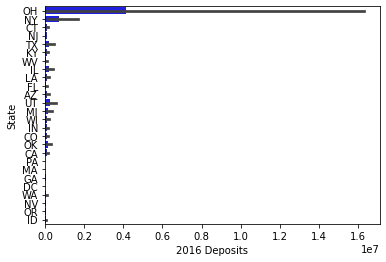

In [5]:
sns.barplot(x="2016 Deposits", y="State", data=df,color="b")

In [20]:
filtered_df = df.dropna(subset=['Latitude', 'Longitude'])

# Create a map object centered on the United States
m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Generate a list of coordinates for the HeatMap layer
coordinates = filtered_df[['Latitude', 'Longitude']].values

# Add the HeatMap layer to the map
HeatMap(coordinates).add_to(m)